## Model Training 
#### 1.1 Import Data and Required Packages


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## modelling

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


### Import data as pandas dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
## dependent and independent variables

X = df.drop('math_score',axis=1)
y = df.math_score
print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")
X.head()

shape of X: (1000, 7)
shape of y: (1000,)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
## Create columns tranformers

num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

print(f"length of numerical cols: {len(num_cols)}")
print(f"length of categorical cols: {len(cat_cols)}")

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('ohe',oh_transformer,cat_cols),
    ('ss',numeric_tranformer,num_cols)
])



length of numerical cols: 2
length of categorical cols: 5


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {X_test.shape}")


shape of X_train: (700, 7)
shape of X_test: (300, 7)
shape of y_train: (700,)
shape of y_test: (300, 7)


In [14]:
## fit the pipeline

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


print(f"shape of X_train after transform: {X_train.shape}")
print(f"shape of X_test after transform: {X_test.shape}")


shape of X_train after transform: (700, 19)
shape of X_test after transform: (300, 19)


In [15]:
## Create an evaluation function

def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual,predicted)
    mae = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    r2 =  r2_score(actual,predicted)
    return mae, mse, rmse, r2

In [28]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ## make predictions

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## evaluate models

    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on train data\n")

    print(f"-- Mean Absolute Error: {train_mae}")
    print(f"-- Mean Squared Error: {train_mse}")
    print(f"-- Root Mean Squared Error: {train_rmse}")
    print(f"-- R2 Score {train_r2}")


    print("==============================================================\n")

    print(f"Model Perfromance on test data\n")
    print(f"-- Mean Absolute Error: {test_mae}")
    print(f"-- Mean Squared Error: {test_mse}")
    print(f"-- Root Mean Squared Error: {test_rmse}")
    print(f"-- R2 Score {test_r2}\n\n")

    r2_list.append(test_r2)




LinearRegression
Model performance on train data

-- Mean Absolute Error: 27.834805385044643
-- Mean Squared Error: 27.834805385044643
-- Root Mean Squared Error: 5.275870106915507
-- R2 Score 0.8848768448103892

Model Perfromance on test data

-- Mean Absolute Error: 31.053682454427083
-- Mean Squared Error: 31.053682454427083
-- Root Mean Squared Error: 5.572583104308727
-- R2 Score 0.845791335372628


Ridge
Model performance on train data

-- Mean Absolute Error: 27.739417770649194
-- Mean Squared Error: 27.739417770649194
-- Root Mean Squared Error: 5.266822359891132
-- R2 Score 0.88527136250086

Model Perfromance on test data

-- Mean Absolute Error: 30.76468904919587
-- Mean Squared Error: 30.76468904919587
-- Root Mean Squared Error: 5.546592562032646
-- R2 Score 0.8472264401197775


Lasso
Model performance on train data

-- Mean Absolute Error: 43.58337232191542
-- Mean Squared Error: 43.58337232191542
-- Root Mean Squared Error: 6.6017703930018214
-- R2 Score 0.819741677152221

## RESULTS

In [36]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Model Name,R2_Score
1,Ridge,0.847226
0,LinearRegression,0.845791
7,CatBoostRegressor,0.835593
6,RandomForestRegressor,0.819912
5,AdaBoostRegressor,0.795364
2,Lasso,0.783885
3,KNeighborsRegressor,0.760278
4,DecisionTreeRegressor,0.728499


## Linear Regression

In [42]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f"R2 score (fit of the model): {'%.2f'%score}")

R2 score (fit of the model): 84.58


## plot y_pred and y_test

(Text(0.5, 0, 'Actual'), Text(0, 0.5, 'predicted'))

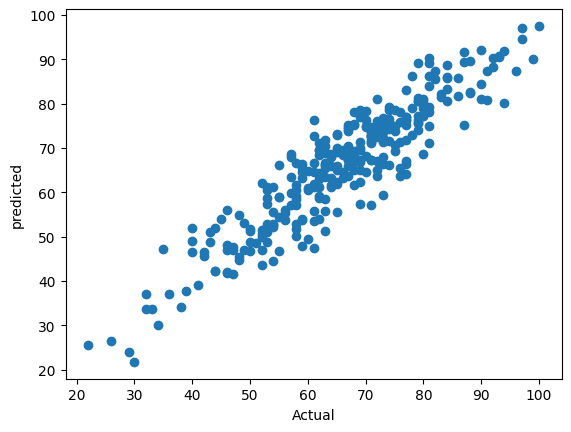

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual"),plt.ylabel("predicted")

<Axes: xlabel='math_score'>

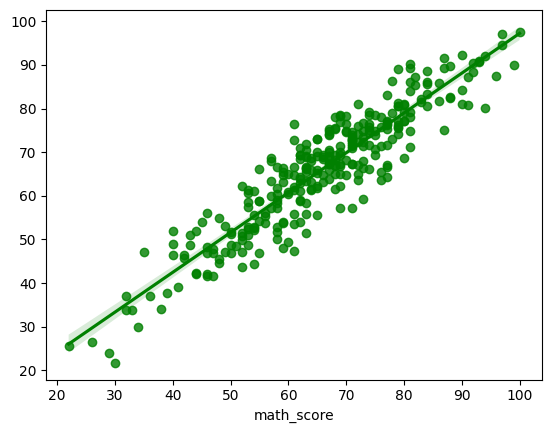

In [45]:
sns.regplot(x=y_test,y=y_pred,color='g')

In [48]:
pd.DataFrame({'Actual Value':y_test,
              "Predicted Value":y_pred,
              "Differenec":y_test-y_pred}).sort_index()

,Actual Value,Predicted Value,Differenec
1,69,78.187500,-9.187500
2,90,84.343750,5.656250
5,71,72.765625,-1.765625
8,64,66.015625,-2.015625
10,58,58.406250,-0.406250
...,...,...,...
992,55,66.125000,-11.125000
993,62,62.968750,-0.968750
996,62,58.796875,3.203125
998,68,66.828125,1.171875
